In [1]:
import numpy as np
import random
from colored import fore

**Check Point 1**

In [5]:
# state  : integer in [0,48]
# action : {'left':0, 'down':1, 'right':2, 'up':3}
# reward : (define your reward scheme here)

# The initializations can be changed if required, shown is only for demonstration 
# value : dict(state --> int) -- initialised to zeros (optional, may not be needed)
# q     : dict((state, action) --> int) -- initialised to ones 
# policy : dict(state --> action) -- initialised to zero
states=[i for i in range(49)]
actions=[i for i in range(4)]#0 = up, 1 = right, 2 = down, 3 = left
value = dict()
q_values = np.zeros((len(states), len(actions)))
rewards=np.array([-2,-2,-2,-1000,-2,-2,-2,-2,-1000,-1,-1,-1,-1000,-2,-3,-2,-2,-2,-2,-2,-2,-2,-2,-1000,+1000,-1000,-2,-1000,-2,-2,-1,-1000,-2,-2,-2,-2,-1000,-2,-2,-1,-6,-2,-1,-2,-2,-2,-2,-1000,-2])
len(rewards)

49

In [16]:
#function to determine whether a state is terminal state or not
def is_terminal_state(state):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  return rewards[state]==-1000 or rewards[state]==1000


def get_starting_location():
  #get a random state
  current_state = np.random.randint(len(states))
  #continue choosing random state until a non-terminal state is identified
  while rewards[current_state]!=-2 and rewards[current_state]!=-4:
    current_state = np.random.randint(len(states))
  return current_state


def get_next_action(current_state, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, then explore
  if np.random.random() < epsilon:
    return np.random.randint(4)
    
  else: #exploit
    return np.argmax(q_values[current_state])
    


#going to the new state
def next_state(state,action):
  new_state = state
  if actions[action] == 0 and state > 6:
    new_state -= 7
  elif actions[action] == 1 and state < 48:
    new_state += 1
  elif actions[action] == 2 and state < 42:
    new_state += 7
  elif actions[action] == 3 and state > 0:
    new_state -= 1
  return (new_state , rewards[new_state])

#taking care of the probabilities
def environment(state, action) :
  r = random.uniform(0,1)
  r2=random.uniform(0,1)
  if rewards[state]==-2 or rewards[state]==-4:
    if r<=0.8:
      return list(next_state(state,action))
    else:
      if r2<=0.5:
        return list(next_state(state,(int(action)+1)%4))
      else:
        return list(next_state(state,(int(action)+3)%4))
  
  elif rewards[state]==-1:
    return list(next_state(state,action))
  
  elif rewards[state]==-3 or rewards[state]==-6:
    if r<=0.5:
      return list(next_state(state,action))
    else:
      if r2<=0.5:
        return list(next_state(state,(int(action)+1)%4))
      else:
        return list(next_state(state,(int(action)+3)%4) )  



  
  '''
  Function that takes in the current state and action, and returns the next state and acquired reward.
  '''
def render(state) :
  pos = 0
  for row in range(7):
    for column in range(7):
      if pos == state:
        if rewards[pos] == -2:
          print(fore.MAGENTA + "W",end=" ")
        elif rewards[pos] == -1:
          print(fore.MAGENTA + "N",end=" ")
        elif rewards[pos] == -3 or rewards[pos] == -6:
          print(fore.MAGENTA + "S",end=" ")
      elif rewards[pos] == -2:
        print(fore.LIGHT_GRAY + "W",end=" ")
      elif rewards[pos] == -1000:
        print(fore.DARK_GRAY + "X",end=" ")
      elif rewards[pos] == -1:
        print(fore.BLUE + "N",end=" ")
      elif rewards[pos] == -3 or rewards[pos] == -6:
        print(fore.RED + "S",end=" ")
      elif rewards[pos] == 1000:
        print(fore.GREEN + "F",end=" ")
      pos += 1
    print()
  return
        
      



In [17]:
render(0)

W W W X W W W 
W X N N N X W 
S W W W W W W 
W W X F X W X 
W W N X W W W 
W X W W N S W 
N W W W W X W 


For the function render(), you need to display a snapshot of the current environment, showing where the agent is present at that instant. You may need to do some googling to check how to print in colour.
An example is shown below(this has been rendered in colab itself):
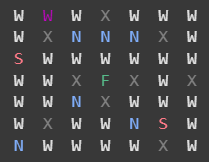

The symbol in *Magneta* shows the position of the agent. The other states are in their natural colours.

In [9]:
#define training parameters

total_episodes = 20000      # Total episodes
learning_rate = 0.9          # Learning rate
max_steps = 99               # Max steps per episode
discount_factor = 0.9                # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob
#run through  training episodes
for episode in range(total_episodes):
  state = get_starting_location()

  while not is_terminal_state(state):

    action_index = get_next_action(state, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location),receive the reward for moving to the new state
    old_state = state 
    state, new_reward = environment(state, action_index)

    # calculate the temporal difference
    old_q_value = q_values[old_state, action_index]
    temporal_difference = new_reward + (discount_factor * np.max(q_values[state])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_state, action_index] = new_q_value
  
 # Reduce epsilon (because we need less and less exploration)
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

print('Training complete!')


Training complete!


In [10]:
#Managing Qvalue table so that the player does not go out of the state space
for state in states:
    if state<7:
        q_values[state][0]=-999
    if state%7==0:
        q_values[state][3]=-999
    if state%7==6:
        q_values[state][1]=-999
    if state>41:
        q_values[state][2]=-999


In [11]:

#The stochaistic path that user follows
def get_path(start_state):
      #return immediately if this is an invalid starting location
  if is_terminal_state(start_state):
    return []
  else: #if this is a 'legal' starting location
    current_state = start_state
    shortest_path = []
    shortest_path.append(current_state)
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_state):
      #get the best action to take
      action_index = get_next_action(current_state, 0)
      #move to the next location on the path, and add the new location to the list
      current_state,nouse = environment(current_state, action_index)
      shortest_path.append(current_state)
    return shortest_path

#array containing all the white cell locations
def get_white_location():
  a=[]
  for state in range(len(states)):
    if rewards[state]==-2 or rewards[state]==-4:
      a.append(state)
  return a


In [40]:
#fn to calculate no of steps, failures and victories in 500 steps
def no_of_steps(index):
  steps=0
  failures=0
  victories=0
  for episode in range(500): 
    state = get_white_location()[index]
    path = get_path(state)
    if is_terminal_state(path[-1]):
      if rewards[path[-1]]==-1000:
        failures+=1
      else:
        victories+=1
    steps+=(len(path)-1)
    print("No.of steps after this round: " + str(steps))
  
  return (steps , failures , victories)
      




print(get_path(15))

In [41]:
steps,fail,vict=no_of_steps(17)
print(steps)
print(fail)
print(vict)


No.of steps after this round: 4
No.of steps after this round: 14
No.of steps after this round: 44
No.of steps after this round: 58
No.of steps after this round: 66
No.of steps after this round: 68
No.of steps after this round: 78
No.of steps after this round: 86
No.of steps after this round: 170
No.of steps after this round: 178
No.of steps after this round: 188
No.of steps after this round: 198
No.of steps after this round: 244
No.of steps after this round: 248
No.of steps after this round: 256
No.of steps after this round: 268
No.of steps after this round: 280
No.of steps after this round: 292
No.of steps after this round: 295
No.of steps after this round: 303
No.of steps after this round: 311
No.of steps after this round: 323
No.of steps after this round: 339
No.of steps after this round: 383
No.of steps after this round: 395
No.of steps after this round: 439
No.of steps after this round: 443
No.of steps after this round: 449
No.of steps after this round: 451
No.of steps after this 

In [32]:
print(get_path(17))

[17, 24]


In [42]:
policy={}
for state in range(49):
    policy[state] = np.argmax(q_values[state])
    
policy

{0: 2,
 1: 1,
 2: 3,
 3: 1,
 4: 1,
 5: 3,
 6: 2,
 7: 0,
 8: 0,
 9: 1,
 10: 2,
 11: 3,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 2,
 18: 0,
 19: 2,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 1,
 29: 0,
 30: 3,
 31: 0,
 32: 2,
 33: 1,
 34: 2,
 35: 2,
 36: 0,
 37: 1,
 38: 2,
 39: 2,
 40: 0,
 41: 2,
 42: 0,
 43: 1,
 44: 0,
 45: 3,
 46: 3,
 47: 0,
 48: 0}